In [2]:
# Breast Cancer Wisconsin  (Classification)

import pandas as pd

df = pd.read_csv('/home/pedro/Desktop/class_ML/wdbc.data',header=None)
    
df.head()    

# https://www.kaggle.com/hdza1991/breast-cancer-wisconsin-data-set

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# statistic

df[1].value_counts(dropna=False)

B    357
M    212
Name: 1, dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values   # 30 feature
y = df.loc[:, 1].values    # label

le = LabelEncoder()     # M or B
y = le.fit_transform(y)


In [4]:
 le.transform(['M', 'B']) # M=1 and B=0


array([1, 0])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [7]:
# import the classificator 
from sklearn.ensemble import RandomForestClassifier
  
# create a classificator object 
classificator = RandomForestClassifier(n_estimators=20,random_state = 0)  
  
# fit the classificator with X and Y data 
classificator.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [8]:
y_pred_class = classificator.predict(X_test)  # Discrete prediction

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_class)

0.9649122807017544

In [11]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_class)


array([[70,  1],
       [ 3, 40]])

In [59]:
# fit the classificator with X and Y data 
y_pred_prob = classificator.predict_proba(X_test)[:,1]


Text(0.5,1,'ROC curve')

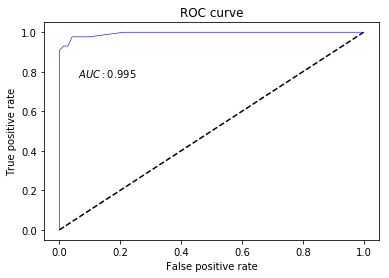

In [55]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob, pos_label=1) # 1 as truth

# Area Under Curve
roc_auc = auc(x=fpr, y=tpr)

#plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='blue', linestyle='-',linewidth=0.6,label='RF (auc = %0.4f)' % roc_auc)
plt.annotate('$AUC: %.3f $ ' % roc_auc, xy=(0.10, 0.75), xycoords='axes fraction')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

